The etas are binned by column integrated Q2 residual of a model built on all of the data (the "base model"). A separate linear model that predicts the residual in both Q1 and Q2 of the base model is built for each bin, which takes the current state as inputs. A logistic regression transitioner is built that takes the current state as inputs, as well as the current eta for each grid box. The stochastic model outputs the sum of the base model prediction and the stochastic bin model predictions. 

We see that the transition scheme works pretty well, as the distribution of bins by latitude matches the true pretty well. The binning scheme works really well for q2, such that when the true etas are used the distribution matches almost perfectly for q2, and much better for q1 but not as well as q2. When the simulated etas are used, the distribution improves about 50% of the way between the base model distribution and the true eta distribution for q2, but hardly improves for q1 at all. This makes sense because the bins are based on q1 not q2. 

These results show promise in the residual binning method, but call for a better way to deal with q2. My next idea is to have separate etas for q1 and q2, and separate linear binning models for q1 and q2, with a transitioner that models the transitions of both q1 and q2 together such that the joint distribution of q1 and q2 is modeled as they are strongly correlated. 

In [1]:
from stochastic_parameterization.residual_stochastic_state_model import (
    StochasticStateModel,
)
%matplotlib inline
from stochastic_parameterization.examine_stochastic_state_model import (
    plot_true_eta_vs_simulated_eta,
    compare_true_to_simulated_q1_q2_distributions,
)

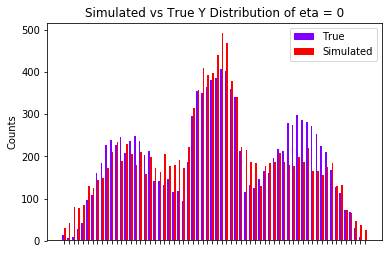

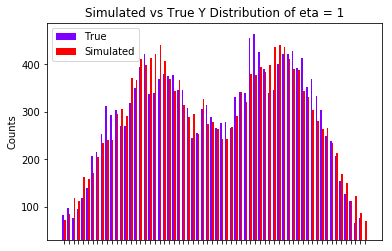

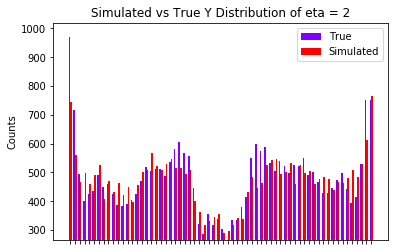

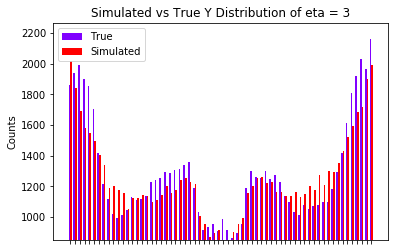

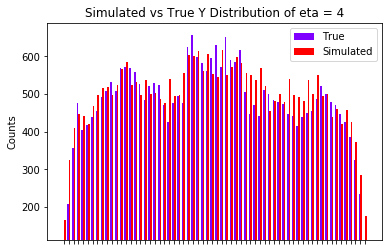

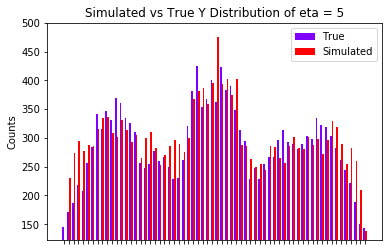

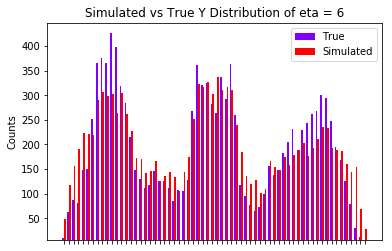

In [2]:
plot_true_eta_vs_simulated_eta()

Distribution comparison using the real etas:

True QT Variance: 1.3013656121505368
Stochastic QT Variance: 1.2346275421226307
Base Model QT Variance: 0.741160389990528
True sli Variance: 7.460251200076044
Stochastic sli Variance: 6.1288383340323165
Base Model sli Variance: 4.3370219738933296


SLI R2 Stochastic Model:  0.8365197776203435
SLI R2 Single Model Model:  0.6256736880370692
QT R2 Stochastic Model:  0.9373101491031538
QT R2 Single Model Model:  0.5644111681307944


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.103302001953125, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_2sampResult(statistic=0.01588948567708337, pvalue=5.328931839314324e-22)
KS Divergence test: SLI true vs single model: Ks_2sampResult(statistic=0.1739044189453125, pvalue=0.0)
KS Divergence test: SLI true vs stochastic model: Ks_2sampResult(statistic=0.11520894368489584, pvalue=0.0)


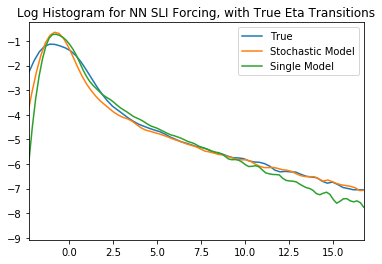

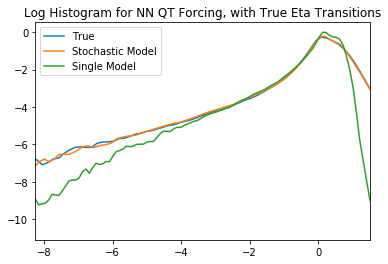

In [3]:
compare_true_to_simulated_q1_q2_distributions(true_etas=True)

Distribution comparison using the simulated etas:

True QT Variance: 1.3013656121505368
Stochastic QT Variance: 1.0485133958406263
Base Model QT Variance: 0.741160389990528
True sli Variance: 7.460251200076044
Stochastic sli Variance: 4.79006642269833
Base Model sli Variance: 4.3370219738933296


SLI R2 Stochastic Model:  0.5292911940281566
SLI R2 Single Model Model:  0.6256736880370692
QT R2 Stochastic Model:  0.2626034583433211
QT R2 Single Model Model:  0.5644111681307944


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.103302001953125, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_2sampResult(statistic=0.04070536295572913, pvalue=5.181381430538668e-142)
KS Divergence test: SLI true vs single model: Ks_2sampResult(statistic=0.1739044189453125, pvalue=0.0)
KS Divergence test: SLI true vs stochastic model: Ks_2sampResult(statistic=0.10092163085937501, pvalue=0.0)


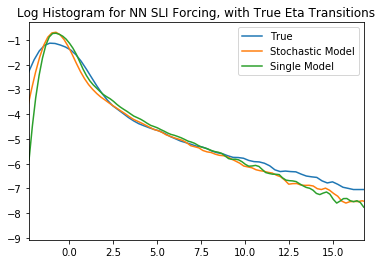

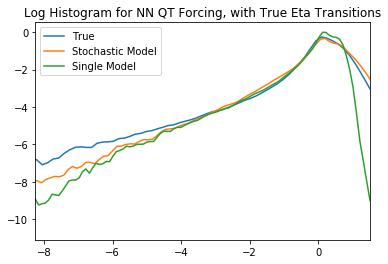

In [4]:
compare_true_to_simulated_q1_q2_distributions(true_etas=False)